In [1]:
%matplotlib inline

import seaborn as sns
import brightside as bs
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [2]:
epochs, train_loss, train_acc, val_loss, val_acc = np.loadtxt('training.log', delimiter=' ', 
                                                              usecols=(1, 3, 5, 7, 9), unpack=True)
labels = ['Train', 'Validation']

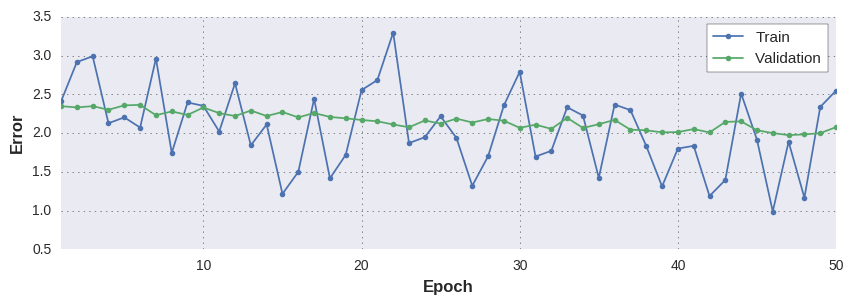

In [3]:
fig, ax = bs.plot_loss([train_loss,val_loss], labels, epochs=epochs, figsize=(10,3))
plt.savefig('loss_plot.png', format='png', dpi=300)

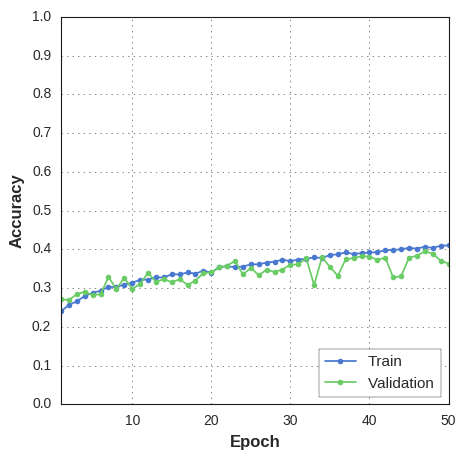

In [4]:
fig, ax = bs.plot_accuracy([train_acc,val_acc], labels, epochs=epochs, figsize=(5,5))
plt.savefig('acc_plot.png', format='png', dpi=300)

In [5]:
predictions, groundtruth = np.loadtxt('predictions.csv', delimiter=' ', unpack=True)
labels = np.genfromtxt('labels.txt',dtype='str')

brightside/__init__.py:103: UserWarning: One or more classes does not have instances
  warnings.warn('One or more classes does not have instances')
/usr/local/lib/python2.7/dist-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/usr/local/lib/python2.7/dist-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


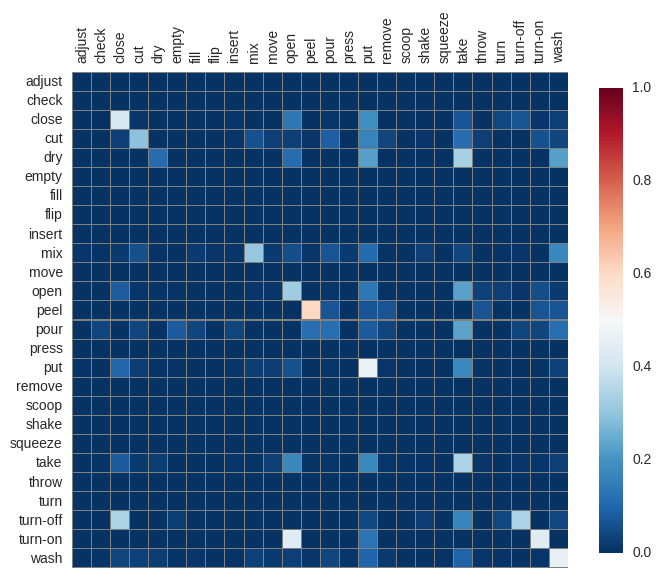

In [6]:
fig, ax = bs.show_confusion_matrix(predictions, groundtruth, labels,
                                   figsize=(8,8), annot=False,
                                   linewidths=0.005, linecolor='gray',
                                   square=True, show_xticks=True,
                                   cbar_kws={"shrink": 0.75})
plt.savefig('cm.png', format='png', dpi=300)

In [7]:
np.random.seed(42)
rand_numbers = np.random.uniform(0,1,100)

bs.print_table('Statistics', [('Min:', rand_numbers.min()),
('Max:', rand_numbers.max()),
('Mean:', rand_numbers.mean()),
('Median:', np.median(rand_numbers)),
('StdDev:', rand_numbers.std()),
('Mode:', stats.mode(rand_numbers).mode[0]),
('Distinct:', np.size(np.unique(rand_numbers)))])

Min:,0.005522117123602399
Max:,0.9868869366005173
Mean:,0.47018074337820936
Median:,0.4641424546894926
StdDev:,0.29599822663249037
Mode:,0.005522117123602399
Distinct:,100


In [8]:
sequences = np.genfromtxt('sequences.csv', delimiter=' ', dtype='str')
labels = np.genfromtxt('activity_labels.txt', delimiter=',', dtype='str')

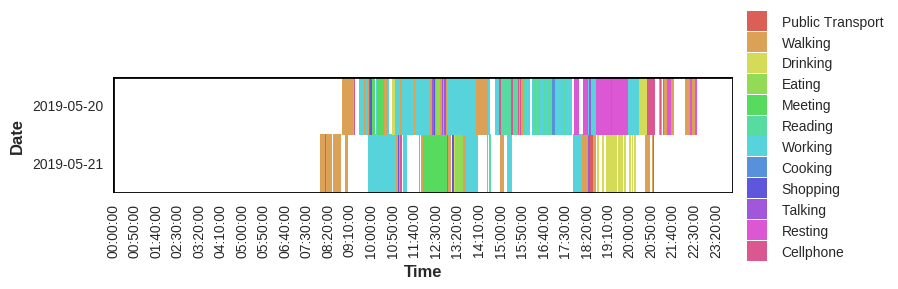

In [9]:
import itertools
import pandas as pd

def time2ind(time):
    hour, minute, second = [int(time[i:i + 2]) for i in range(0, 6, 2)]
    index = 120 * hour + 2 * minute + (1 if second > 30 else 0)
    return index

days = -np.ones((2, 2880), np.int)
dates = ['2019-05-20', '2019-05-21']
for date, time, label in sequences:
    index = time2ind(time)
    i = 0 if date == '2019-05-20' else 1
    days[i, index] = int(label)

times = list()
for time in itertools.product(range(24), range(60), range(0, 60, 30)):
    times.append(':'.join([str(t).zfill(2) for t in time]))

colors = sns.color_palette("hls", len(labels))
labels_colors = {i: (label, colors[i]) for i, label in enumerate(labels)}

dataframe = pd.DataFrame(data=days, index=dates, columns=times)
fig, ax, leg = bs.show_sequences(dataframe, labels_colors, figsize=(8, 1.5), xticklabels=100, mask_value=-1,
                                 leg_square_size=7, show_box=True, plot_xlabel='Time', plot_ylabel='Date')
plt.savefig('sequences.png', format='png', dpi=300)